Автор: Лейман М.А.   
Дата создания: 28.04.2025  

# Задание ZALA  
## 4. Детектирование множества объектов
### ___Модель___: __MobileNet GridNet__   
#### ___Backbone___: MobileNet  
#### ___Детекция___: на выходе последнего слоя детекция  

Предсказывает ячейки в которых есть объекты

#### Многоклассовая детекция

Датасеты: DOTA, UAVOD, VEDAI



## Импорты

In [4]:
import time
from glob import glob
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import torch
from matplotlib import rcParams
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (14,6)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from IPython.display import clear_output
import random
from torch.utils.data import random_split
from PIL import ImageOps
from tqdm import tqdm


print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/develops/python/env1/bin/python

Текущее положение: 
/home/maksim/develops/python/Zala_task/Zala_task


## Проверка GPU

In [5]:
# Устанавливаем device:  gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.7.1+cu126
версия  cuDNN:           91100
Tue Aug 12 19:53:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.57.08              Driver Version: 575.57.08      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        On  |   00000000:01:00.0  On |                  N/A |
|  0%   52C    P8             22W /  170W |    1115MiB /  12288MiB |     25%      Default |
|                                         

In [6]:
# Получаем текущую директорию
path_dir = os.getcwd()
print("Текущая директория:", path_dir)

DATA_DIR = os.path.abspath(os.path.join(path_dir, 'dataset'))
print("Путь к dataset:", DATA_DIR)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Текущая директория: /home/maksim/develops/python/Zala_task/Zala_task
Путь к dataset: /home/maksim/develops/python/Zala_task/Zala_task/dataset


## ДАТАСЕТ

In [7]:
from utils.dataset import YOLOHeatmapDataset


## Загрузка датасета

In [8]:
from torch.utils.data import DataLoader
from torchvision import transforms

image_size=736
grid_size=30
num_classes=8
num_anchors=3

# Получаем текущую рабочую папку  
current_directory = os.getcwd()  

from torch.utils.data import DataLoader


# Получаем текущую рабочую папку  
current_directory = os.getcwd()  

path_dataset = os.path.join(current_directory, "data/dataset/dataset_full_1")

# Датасет  train
images_dir="images/train/"
targets_dir="labels/train/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)

dataset_train_1 = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)

# Датасет  test
images_dir="images/test/"
targets_dir="labels/test/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)

dataset_test = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)


# Датасет  val
images_dir="images/val/"
targets_dir="labels/val/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)

dataset_val = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)



path_dataset = os.path.join(current_directory, "data/dataset/dataset_full_2")

# Датасет  train
images_dir="images/train/"
targets_dir="labels/train/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)

dataset_train_2 = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)


path_dataset = os.path.join(current_directory, "data/dataset/dataset_full_3")

# Датасет  train
images_dir="images/train/"
targets_dir="labels/train/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)


dataset_train_3 = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)

path_dataset = os.path.join(current_directory, "data/dataset/dataset_full_4")
images_dir="images/train/"
targets_dir="labels/train/"
path_image = os.path.join(path_dataset, images_dir)
path_label = os.path.join(path_dataset, targets_dir)

dataset_train_4 = YOLOHeatmapDataset(
    images_dir=path_image,
    labels_dir=path_label,
    image_size=736,
    grid_size=grid_size,
    num_classes=num_classes,
    num_anchors=num_anchors
)




batch_size = 12

train_loader_1 = DataLoader(dataset_train_1, batch_size=batch_size, shuffle=True)
train_loader_2 = DataLoader(dataset_train_2, batch_size=batch_size, shuffle=True)


print("Длина dataset_train_3:", len(dataset_train_3))

train_loader_3 = DataLoader(dataset_train_3, batch_size=batch_size, shuffle=True)
train_loader_4 = DataLoader(dataset_train_4, batch_size=batch_size, shuffle=True)

val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

Длина dataset_train_3: 16178


## Визуализация 

B*C, S, S torch.Size([24, 30, 30])


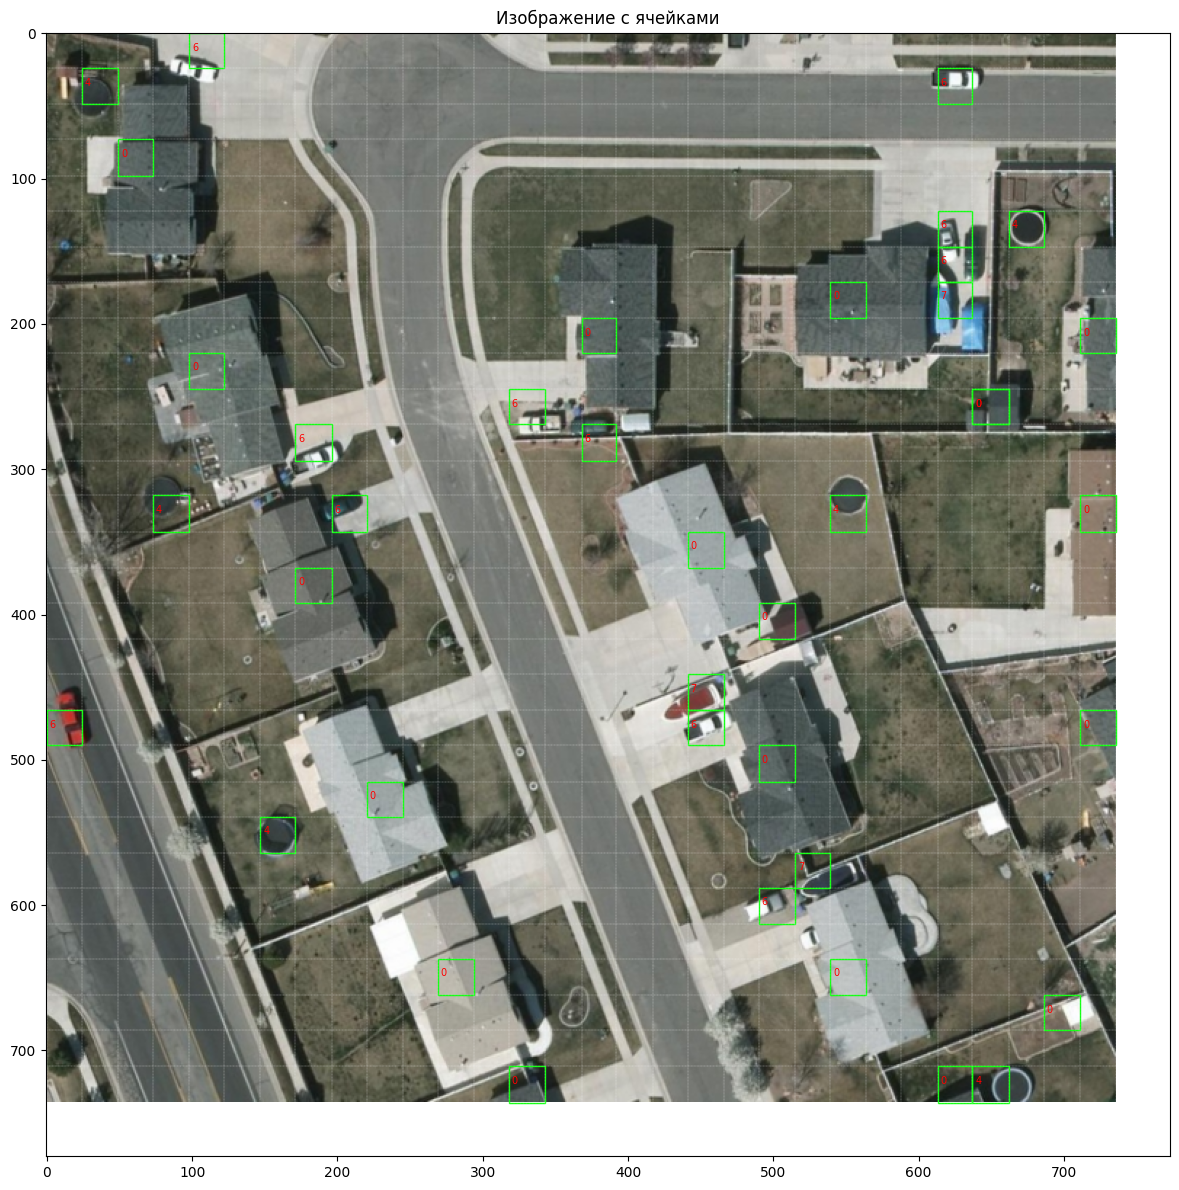

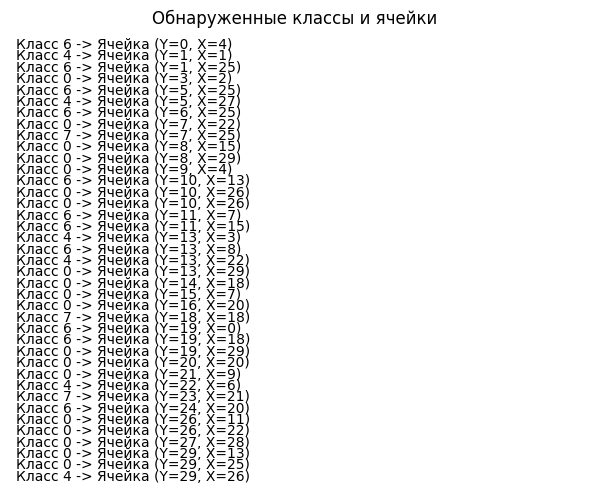

In [ ]:
from utils.visualize_img import visualize_sample_heatmap

for images, targets in train_loader_3:
    img = images[0]
    target = targets[0]
    # target = target.permute(2, 3, 0, 1)
    print("B*C, S, S", target.shape)
    visualize_sample_heatmap(img, target)
    break  # Только один раз


## МОДЕЛЬ

In [7]:
import torch
import torch.nn as nn
from model.model import YOLOCellClassifier

# Получаем текущую рабочую папку  
current_directory = os.getcwd()  
save_path = os.path.join(current_directory, "data/models/models_custom/checkpoints")
name_model = "ancorMobileNet_model_1.pth"

model_path = os.path.join(save_path, name_model)

model = YOLOCellClassifier(num_classes=8)

model.load_state_dict(torch.load(model_path))



<All keys matched successfully>

## LOSS 

In [8]:
from utils.train import YOLOSimplifiedLoss


## Метрика

In [9]:
from utils.train import calculate_precision_recall

## Функция тренировки

In [10]:
from utils.train import train_model_grid_net


## Обучение


 Epoch 1/13 | Train Loss: 3.0549 | Val Loss: 8.1798 | Val Prec: 0.3909 | Val Recall: 0.4172

Сохранена лучшая модель 1 с val recall 0.4172



 Epoch 2/13 | Train Loss: 14.0468 | Val Loss: 5.2589 | Val Prec: 0.3696 | Val Recall: 0.5549

Сохранена лучшая модель 2 с val recall 0.5549



 Epoch 3/13 | Train Loss: 12.5554 | Val Loss: 5.4350 | Val Prec: 0.3652 | Val Recall: 0.5351




 Epoch 4/13 | Train Loss: 14.4524 | Val Loss: 5.2372 | Val Prec: 0.3548 | Val Recall: 0.5473




 Epoch 5/13 | Train Loss: 15.8259 | Val Loss: 4.6468 | Val Prec: 0.3796 | Val Recall: 0.5647

Сохранена лучшая модель 5 с val recall 0.5647



 Epoch 6/13 | Train Loss: 13.7585 | Val Loss: 4.9448 | Val Prec: 0.3557 | Val Recall: 0.5540




 Epoch 7/13 | Train Loss: 15.0805 | Val Loss: 4.5628 | Val Prec: 0.3796 | Val Recall: 0.5665

Сохранена лучшая модель 7 с val recall 0.5665



 Epoch 8/13 | Train Loss: 13.1782 | Val Loss: 4.7260 | Val Prec: 0.3680 | Val Recall: 0.5620




 Epoch 9/13 | Train Loss: 14.7170 | Val Loss: 4.3910 | Val Prec: 0.3851 | Val Recall: 0.5597




 Epoch 10/13 | Train Loss: 12.9683 | Val Loss: 4.4775 | Val Prec: 0.3802 | Val Recall: 0.5703

Сохранена лучшая модель 10 с val recall 0.5703



 Epoch 11/13 | Train Loss: 14.3362 | Val Loss: 4.3468 | Val Prec: 0.3885 | Val Recall: 0.5681




 Epoch 12/13 | Train Loss: 12.8891 | Val Loss: 4.4165 | Val Prec: 0.3774 | Val Recall: 0.5574




 Epoch 13/13 | Train Loss: 14.2313 | Val Loss: 4.3201 | Val Prec: 0.3904 | Val Recall: 0.5701



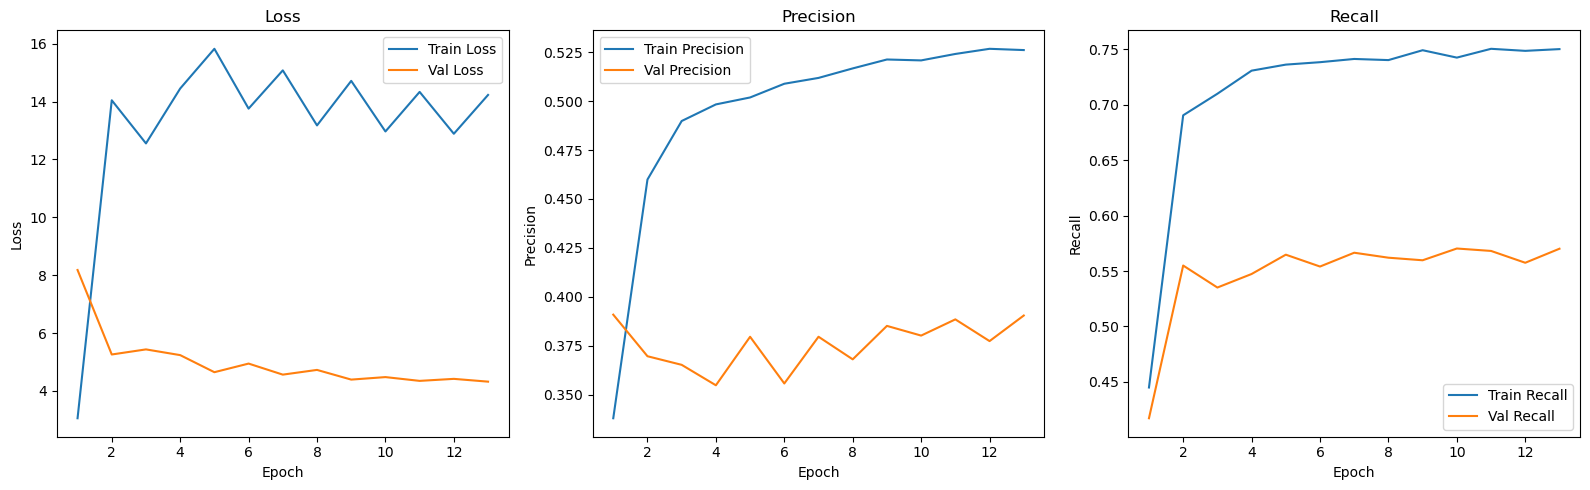

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import gc
gc.collect()
torch.cuda.empty_cache()

# Получаем текущую рабочую папку  
current_directory = os.getcwd()  
save_path = os.path.join(current_directory, "data/models/models_custom/checkpoints")
name_model = "ancorMobileNet_model_1.pth"

model_path = os.path.join(save_path, name_model)

model = YOLOCellClassifier(num_classes=8)

model.load_state_dict(torch.load(model_path))



#  Оптимайзер
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.0001,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0.001,  # регуляризация
    amsgrad=False
)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=num_epochs)



# Функция потерь 
loss_fn = YOLOSimplifiedLoss(S=30, B=3, C=8)


metric_fn = calculate_precision_recall

history = train_model_grid_net(
    model,
    train_loader_1,
    train_loader_2,
    train_loader_3,
    train_loader_4,
    val_loader,
    optimizer,
    scheduler,
    loss_fn=loss_fn,
    metric_fn=metric_fn,
    num_epochs=13,
    device='cuda',
    save_path=model_path
)


## Использование модели

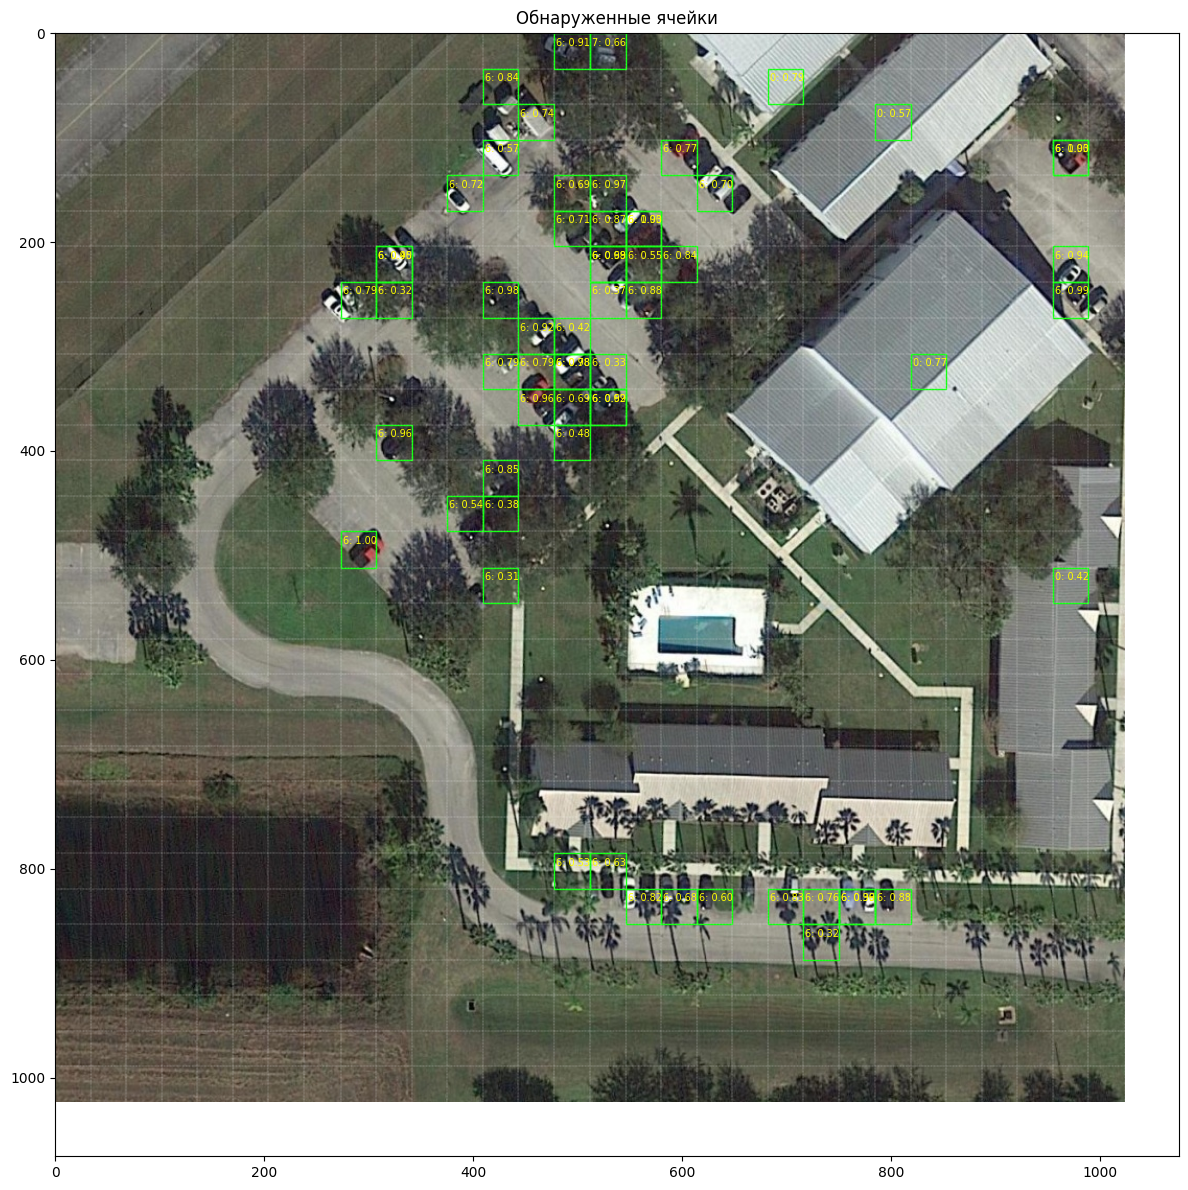

/home/maksim/develops/python/Zala_task/Zala_task/utils/inference.py:213: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


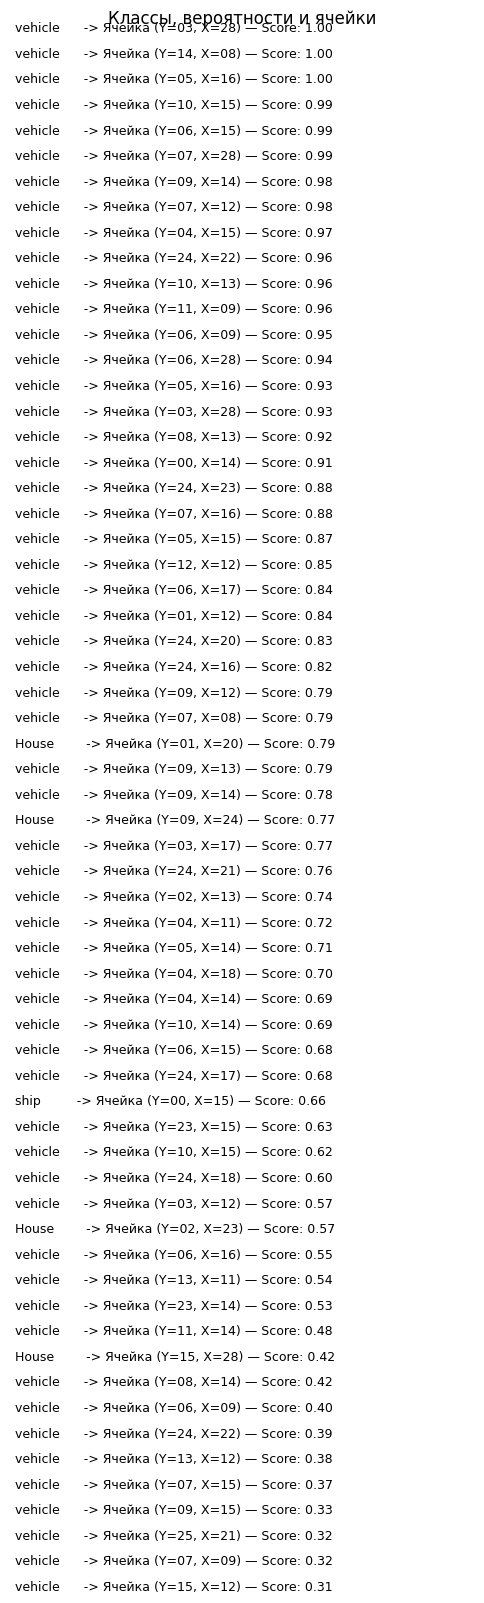

In [3]:
import torch
import torch.nn as nn
from model.model import YOLOCellClassifier
from utils.inference import inference_model_grid_net
import os 

#  Названия классов:
class_names = ['House', 'Plane', 'mesh', 'harbor', 'well', 'helicopter', 'vehicle', 'ship']

# Путь к изображению
current_directory = os.getcwd()  
img_path = os.path.join(current_directory, "data/dataset/TEST/images/P0179_0_crop8.jpg")

current_directory = os.getcwd()  
save_path = os.path.join(current_directory, "data/models/models_custom/checkpoints")
name_model = "ancorMobileNet_model_1.pth"

model_path = os.path.join(save_path, name_model)

# 1. Создаём модель
model = YOLOCellClassifier(num_classes=8)

# 2. Загружаем сохранённые веса
model.load_state_dict(torch.load(model_path, map_location='cpu')) 

# 3. Переводим модель в eval режим
model.eval()


# Визуализация:
inference_model_grid_net(model, img_path, threshold=0.3,
                            num_anchors=3, num_classes=8,
                            class_names=class_names)
